# 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0
]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。


numpy.random.multivariate_normal — NumPy v1.19 Manual


作成したndarrayのshapeは(500, 2)になります。


《シード値について》


実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [9]:
import numpy as np

mean = (-3, 0)
cov = ([[1.0,0.8],[0.8, 1.0]]) #分散１、共分散0.8
size = 500 #個数

#乱数の固定
np.random.seed(0)
np.set_printoptions(threshold=10)

normal_distribution = np.random.multivariate_normal(mean=mean,cov=cov, size=size)
normal_distribution

array([[-4.80006782, -1.54698618],
       [-4.63714503, -0.21987973],
       [-4.46267867, -2.08076347],
       ...,
       [-3.40484501, -0.14372258],
       [-2.8415685 ,  0.21800394],
       [-1.79803505,  0.97547372]])

# 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。



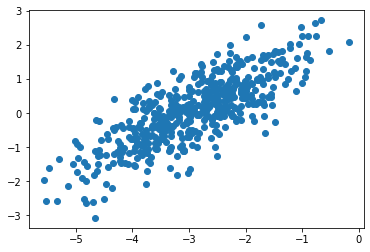

In [3]:
import matplotlib.pyplot as plt
plt.scatter(normal_distribution[:,0],normal_distribution[:,1])
plt.show()

# 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。


matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

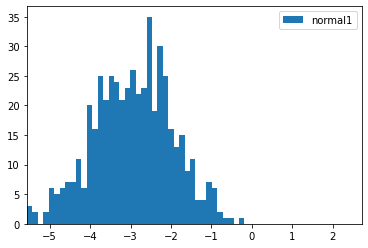

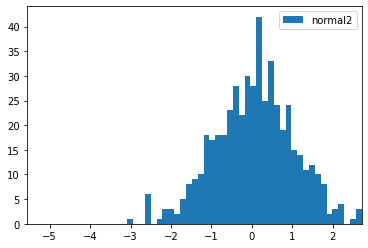

In [4]:
plt.figure(0)
plt.hist(normal_distribution[:,0], bins=40, label="normal1")
plt.xlim(np.min(normal_distribution), np.max(normal_distribution[:,1]))
plt.legend()

plt.figure(1)
plt.hist(normal_distribution[:,1],bins=40, label="normal2")
plt.xlim(np.min(normal_distribution), np.max(normal_distribution[:,1]))
plt.legend()

# 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0
]

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。

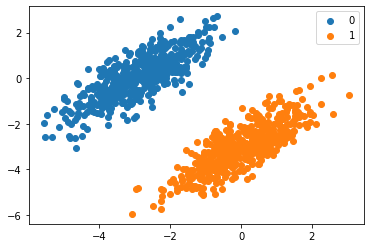

In [5]:
import numpy as np

mean = (0,-3)
cov = np.array([[1.0,0.8],[0.8,1.0]])
size = 500

normal_distribution2 = np.random.multivariate_normal(mean,cov,size)


import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(normal_distribution[:,0],normal_distribution[:,1], label="0")
plt.scatter(normal_distribution2[:,0],normal_distribution2[:,1], label="1")
plt.legend(loc="best")

plt.show()


# 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。


numpy.concatenate — NumPy v1.19 Manual


numpy.vstack — NumPy v1.19 Manual



In [8]:
# 統合 パターン１
total_distribution = np.concatenate([normal_distribution,normal_distribution2], axis=0)

# 統合パターン２ axisなし
total_distribution = np.vstack([normal_distribution,normal_distribution2])
total_distribution

array([[-4.80006782, -1.54698618],
       [-4.63714503, -0.21987973],
       [-4.46267867, -2.08076347],
       ...,
       [-0.2185878 , -3.15676476],
       [-1.37970304, -4.27950068],
       [ 1.49786804, -2.33126243]])

# 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。


《作成例》


データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

In [7]:
#０、１のラベル作成
zeros = np.zeros([500,1])
ones = np.ones([500,1])
labeler = np.concatenate([zeros,ones], axis=0)
print(labeler.shape)

total_distribution = np.hstack([total_distribution, labeler])

print(total_distribution.shape)
print(total_distribution)

(1000, 1)
(1000, 3)
[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]
